# Blog Resources
- https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/
- https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

# Naive Bayes From Scratch On OR and XOR

In [1]:
# Example of calculating class probabilities
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt
import copy

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

In [2]:
# data
dataset_or = [[0.11, 0.12, 0], 
              [0.12, 0.11, 0], 
              [0.13, 0.11, 0], 
              [0.1,  1.1,  1], 
              [0.12, 1.21, 1], 
              [0.2,  1.2,  1], 
              [1.1,  0.1,  1], 
              [1.2,  0.2,  1], 
              [1.15, 0.21, 1], 
              [1.1,  1.2,  1], 
              [1.2,  1.15, 1], 
              [1.23, 1.18, 1]]

dataset_xor = [[0.11, 0.12, 0], 
               [0.12, 0.11, 0],
               [0.13, 0.11, 0], 
               [0.1,  1.1,  1],
               [0.12, 1.21, 1],
               [0.2,  1.2,  1],
               [1.1,  0.1,  1], 
               [1.2,  0.2,  1],
               [1.15, 0.21, 1],
               [1.1,  1.2,  0],
               [1.2,  1.15, 0],
               [1.23, 1.18, 0]]

In [3]:
def predict_from_scratch(dataset):
    preds = []
    summaries = summarize_by_class(dataset)
    for row in dataset:
        prob = calculate_class_probabilities(summaries, row)
        if prob[0] > prob[1]:
            preds += [0]
        else:
            preds += [1]
    return preds

def generate_dataset_pred(dataset, preds):
    dataset_pred = copy.deepcopy(dataset)
    [c.pop(2) for c in dataset_pred]
    dataset_pred = [dataset_pred[i] + [preds[i]] for i in range(len(dataset_pred))]
    
    return dataset_pred

def data_prep_plot(dataset):
    sep = separate_by_class(dataset)
    sep0 = [column for column in zip(*sep[0])]
    sep1 = [column for column in zip(*sep[1])]
    x0, y0, _ = sep0
    x1, y1, _ = sep1
    
    return (x0,y0,x1,y1)

def plot_data(true, pred):
    x0_true ,y0_true ,x1_true ,y1_true = true
    x0_pred ,y0_pred ,x1_pred ,y1_pred = pred
    
    fig, axs = plt.subplots(1, 2)

    axs[0].scatter(x0_true,y0_true, c='r', label='0')
    axs[0].scatter(x1_true,y1_true, c='b', label='1')
    axs[0].set_title('True')
    axs[1].scatter(x0_pred,y0_pred, c='r', label='0')
    axs[1].scatter(x1_pred,y1_pred, c='b', label='1')
    axs[1].set_title('Predicted')
    
    axs[1].legend(bbox_to_anchor=(1.05, 1.05))
    
    return ''

In [4]:
# test prediction
summaries_or = summarize_by_class(dataset_or)
summaries_xor = summarize_by_class(dataset_xor)
probabilities_or = calculate_class_probabilities(summaries_or, dataset_or[0])
probabilities_xor = calculate_class_probabilities(summaries_xor, dataset_xor[0])

print(probabilities_or, probabilities_xor)

{0: 214.60699433952524, 1: 0.063774509052287} {0: 0.10198682638054953, 1: 0.09935774905624883}


In [5]:
# get all predictions
pred_or = predict_from_scratch(dataset_or)
pred_xor = predict_from_scratch(dataset_xor)

# dataset with new predictions     
dataset_or_pred = generate_dataset_pred(dataset_or, pred_or)
dataset_xor_pred = generate_dataset_pred(dataset_xor, pred_xor)

In [6]:
# prep for plot
# true
x0_or, y0_or, x1_or, y1_or = data_prep_plot(dataset_or)
x0_xor, y0_xor, x1_xor, y1_xor = data_prep_plot(dataset_xor)

# pred 
x0_or_pred, y0_or_pred, x1_or_pred, y1_or_pred = data_prep_plot(dataset_or_pred)
x0_xor_pred, y0_xor_pred, x1_xor_pred, y1_xor_pred = data_prep_plot(dataset_xor_pred)

#or
true_data_or = [x0_or,y0_or,x1_or,y1_or]
pred_data_or = [x0_or_pred,y0_or_pred,x1_or_pred,y1_or_pred]

#xor
true_data_xor = [x0_xor,y0_xor,x1_xor,y1_xor]
pred_data_xor = [x0_xor_pred,y0_xor_pred,x1_xor_pred,y1_xor_pred]

OR


''

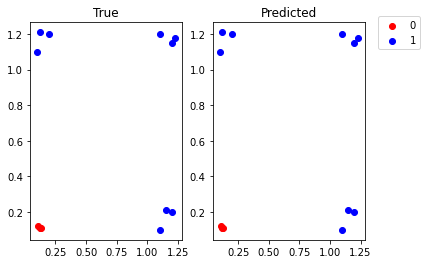

In [7]:
print('OR')
plot_data(true_data_or, pred_data_or)

XOR


''

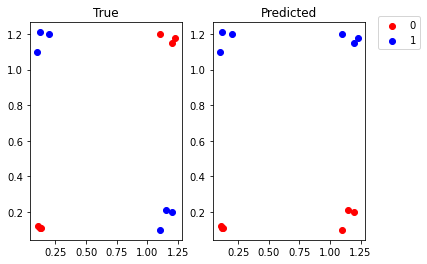

In [8]:
print('XOR')
plot_data(true_data_xor, pred_data_xor)

We can see that our XOR prediction is incorrect.

# Naive Bayes SciPy Model On OR and XOR

In [9]:
# example of preparing and making a prediction with a naive bayes model
from scipy.stats import norm
import numpy as np
from numpy import mean
from numpy import std
 
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
    mu = mean(data)
    sigma = std(data)
    print(mu, sigma)
    # fit distribution
    dist = norm(mu, sigma)
    return dist
 
# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

def predict_scipy(dataset):
    # prep data
    x, y, l =  [col for col in zip(*dataset)]
    X = np.array(list(zip(x,y)))
    y = np.array(l)
    
    sep = separate_by_class(dataset)
    sep0 = [col for col in zip(*sep[0])]
    sep1 = [col for col in zip(*sep[1])]
    
    Xy0 = np.array(list(zip(sep0[0], sep0[1])))
    Xy1 = np.array(list(zip(sep1[0], sep1[1])))
    
    # stats
    # calculate priors or
    priory0 = len(Xy0) / len(X)
    priory1 = len(Xy1) / len(X)
    # create PDFs for y==0
    distX1y0 = fit_distribution(Xy0[:, 0])
    distX2y0 = fit_distribution(Xy0[:, 1])
    # create PDFs for y==1
    distX1y1 = fit_distribution(Xy1[:, 0])
    distX2y1 = fit_distribution(Xy1[:, 1])
    
    # pred
    
    preds = []
    
    for row in dataset:
        py0 = probability(row, priory0, distX1y0, distX2y0)
        py1 = probability(row, priory1, distX1y1, distX2y1)
        if py0 > py1:
            preds += [0]
        else:
            preds += [1]
    
    return preds

In [10]:
# pred
pred_or = predict_scipy(dataset_or)
pred_xor = predict_scipy(dataset_xor)

# data with new pred labels
dataset_or_pred = generate_dataset_pred(dataset_or, pred_or)
dataset_xor_pred = generate_dataset_pred(dataset_xor, pred_xor)

0.12 0.008164965809277263
0.11333333333333333 0.004714045207910314
0.8222222222222223 0.48480873153527204
0.8388888888888889 0.4748671029162777
0.6483333333333333 0.5298243943882622
0.645 0.5318756120247163
0.6449999999999999 0.5067461560452794
0.67 0.5024606120549816


In [11]:
# prep for plot
# true
x0_or, y0_or, x1_or, y1_or = data_prep_plot(dataset_or)
x0_xor, y0_xor, x1_xor, y1_xor = data_prep_plot(dataset_xor)

# pred 
x0_or_pred, y0_or_pred, x1_or_pred, y1_or_pred = data_prep_plot(dataset_or_pred)
x0_xor_pred, y0_xor_pred, x1_xor_pred, y1_xor_pred = data_prep_plot(dataset_xor_pred)

#or
true_data_or = [x0_or,y0_or,x1_or,y1_or]
pred_data_or = [x0_or_pred,y0_or_pred,x1_or_pred,y1_or_pred]

#xor
true_data_xor = [x0_xor,y0_xor,x1_xor,y1_xor]
pred_data_xor = [x0_xor_pred,y0_xor_pred,x1_xor_pred,y1_xor_pred]

OR


''

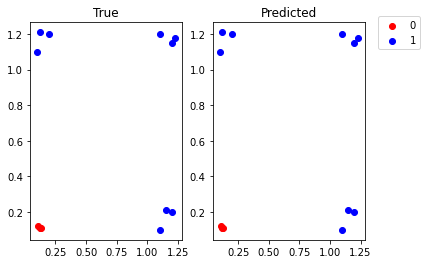

In [12]:
print('OR')
plot_data(true_data_or, pred_data_or)

XOR


''

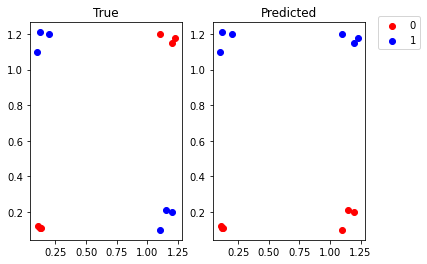

In [13]:
print('XOR')
plot_data(true_data_xor, pred_data_xor)

# Naive Bayes SKLean Model On OR and XOR

## OR

In [14]:
# example of gaussian naive bayes
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

def predict_sklearn(dataset):
    # prep data
    x, y, l =  [col for col in zip(*dataset)]
    X = np.array(list(zip(x,y)))
    y = np.array(l)
    
    # define the model
    model = GaussianNB()
    # fit the model
    model.fit(X, y)

    # pred
    preds = []
    
    for row in X:
        yhat_prob = model.predict_proba([row])
    
        if yhat_prob[0][0] > yhat_prob[0][1]:
            preds += [0]
        else:
            preds += [1]
    
    return preds

In [19]:
# get all predictions
pred_or = predict_sklearn(dataset_or)
pred_xor = predict_sklearn(dataset_xor)

# data with new pred labels
dataset_or_pred = generate_dataset_pred(dataset_or, pred_or)
dataset_xor_pred = generate_dataset_pred(dataset_xor, pred_xor)

In [20]:
# prep for plot
# true
x0_or, y0_or, x1_or, y1_or = data_prep_plot(dataset_or)
x0_xor, y0_xor, x1_xor, y1_xor = data_prep_plot(dataset_xor)

# pred 
x0_or_pred, y0_or_pred, x1_or_pred, y1_or_pred = data_prep_plot(dataset_or_pred)
x0_xor_pred, y0_xor_pred, x1_xor_pred, y1_xor_pred = data_prep_plot(dataset_xor_pred)

#or
true_data_or = [x0_or,y0_or,x1_or,y1_or]
pred_data_or = [x0_or_pred,y0_or_pred,x1_or_pred,y1_or_pred]

#xor
true_data_xor = [x0_xor,y0_xor,x1_xor,y1_xor]
pred_data_xor = [x0_xor_pred,y0_xor_pred,x1_xor_pred,y1_xor_pred]

OR


''

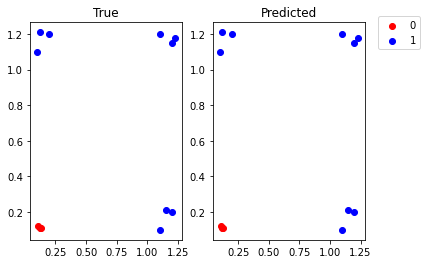

In [21]:
print('OR')
plot_data(true_data_or, pred_data_or)

XOR


''

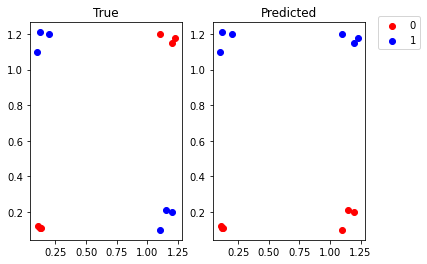

In [22]:
print('XOR')
plot_data(true_data_xor, pred_data_xor)